# 공공 인공지능 OPEN API 활용
https://aiopen.etri.re.kr/guide_od.php 의 샘플코드 활용

In [1]:
with open ('etriaikey.txt') as kfile:           # read가 디폴트 
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

## 객체 하나 있는 경우 

In [3]:
import os
img_file = 'images/elephant.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [4]:
# 3항 연산자로 앞에 . 지우고, 예외(jfif)처리
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

이미지 컨텐츠 가져오기  
바이너리 파일의 경우 read면 rb 적어줘야 함

In [5]:
with open(img_file,'rb') as file:            
    imageContents = base64.b64encode(file.read()).decode("utf8")

In [6]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": imageContents
    }
}


In [7]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

responseCode가 200이라는 것 -> 잘 되었다!

In [8]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [9]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"bird","confidence":"0.631125","x":"81","y":"144","width":"23","height":"21"},{"class":"elephant","confidence":"0.995636","x":"93","y":"47","width":"106","height":"87"}]}}'

In [10]:
# json 형식으로 읽어오기
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'bird',
    'confidence': '0.631125',
    'x': '81',
    'y': '144',
    'width': '23',
    'height': '21'},
   {'class': 'elephant',
    'confidence': '0.995636',
    'x': '93',
    'y': '47',
    'width': '106',
    'height': '87'}]}}

### 시각화

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

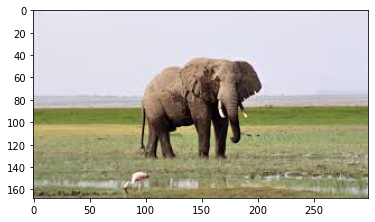

In [30]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(img_file)
plt.imshow(image)
plt.show()

이 위에 그림을 그려보자. 

In [31]:
obj_list = result['return_object']['data']
obj_list[1]         # 코끼리

{'class': 'elephant',
 'confidence': '0.995636',
 'x': '93',
 'y': '47',
 'width': '106',
 'height': '87'}

In [32]:
draw = ImageDraw.Draw(image)
obj = obj_list[1]
name = obj['class']
x = int(obj['x'])           # 현재 스트링으로 들어있으니 좌표를 위해 int로 변경
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x,y),name, font=ImageFont.truetype('malgun.ttf',20),fill=(255,0,0))      # fill => red
draw.rectangle(((x,y),(x+w+10,y+h+10)), outline = (255,0,0), width=2)

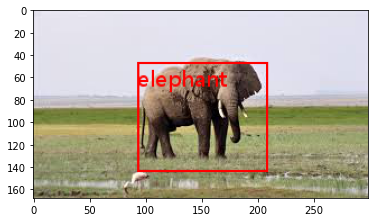

In [33]:
plt.imshow(image)
plt.show()